# Homework 1

## IMPORTANT NOTES
**Teams**
- You are encouraged to work in teams of two.
- Each team member must submit the file!
- State that you worked as a team: in the filename and/or inside the notebook.

**Submission**
- deadline is Wednesdays 8 am (such that I can give you feedback until the tutorial)
- extended deadline is Wednesday 4 pm (with a 25% point deduction)
- Put your name into the file name and upload to ILIAS (each team member).
- We recommend solving the theoretical exercises inside the notebook, which will improve your Latex skills. Alternatively, submit the theoretical exercises as pdf.

**Use of LLMs**
- you are allowed and encouraged to use LLMs (github copilot is free for students, Le Chat, ChatGPT, etc.)
- you must edit the code! Especially, make sure
    - you understand the code,
    - that it's correct
    - that it's concise
- you are responsible for your submission

**Plots**
- plots must have every element labeled (axes, lines, dots, ...)
- optionally, make your plots nicer: sns.despine(), ax.legend(frameon=False), etc.
- choose a reasonable figsize (big enough to have everything visible, small enough to fit within the width of a hypothetical half or full A4 page)

In [ ]:
#from IPython.display import display, Math, Latex

# Libraries you might need
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

In [ ]:
# You can use this function for plotting raster plots (spikes), or you can use your own defined function
def raster(event_times_list, ylabel="Spike train", color="k", t_max=10.0, ax=None):
    """
    Creates a raster plot
    Parameters
    ----------
    event_times_list : iterable
                       a list of event time iterables
    color : string
            color of vlines
    Returns
    -------
    ax : an axis containing the raster plot
    https://scimusing.wordpress.com/2013/05/06/making-raster-plots-in-python-with-matplotlib/
    """
    if ax is None:
        ax = plt.gca()
    for ith, trial in enumerate(event_times_list):
        ax.vlines(trial, ith + 0.5, ith + 1.5, color=color)
    ax.set_ylim(0.5, len(event_times_list) + 0.5)
    ax.set_yticks([])
    ax.set_ylabel(ylabel)
    ax.set_xlim((0, t_max))
    ax.set_xlabel("Time [s]")
    return ax

## Exercise 1

1) Take interval [0,10 sec]. We will simulate spikes within this interval to form a Poisson spike train. To do so we are going to use exponenetial distribution for inter-spike intervals. First spike-time (relative to time 0) is drawn from the exponential distribution with parameter $\tau$ , thus $t_1 \sim Exp(\tau) = 1/\tau e^{-t_1/\tau}$. All subsequent spikes are determined relative to the previous via $t_{k+1} = t_k + \Delta t$ with $\Delta t \sim Exp(\tau)$. Stop when the new spike-time exceed 10 sec. (1.5 points per each sub-task, tasks with a "*" give additional points)

<Axes: xlabel='Time [s]', ylabel='Spike train'>

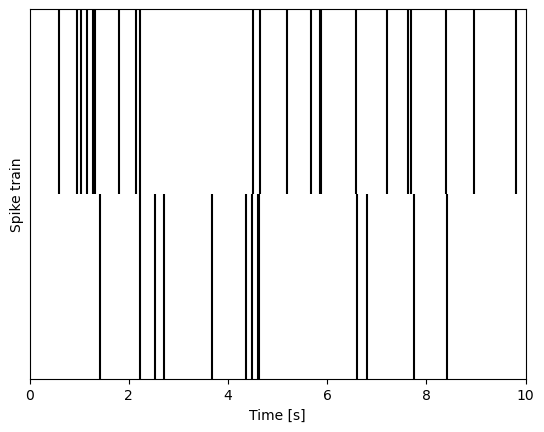

In [ ]:
def poisson_spike_train_simple(tau, length, n_trials):
    all_spike_times = []
    for _ in range(n_trials):
        t = np.random.exponential(tau)
        spike_times = []
        while t < length:
            spike_times = spike_times + [t]
            t += np.random.exponential(tau)
        all_spike_times = [*all_spike_times, spike_times]

    return all_spike_times


# test
spike_times = poisson_spike_train_simple(.5, 10., 2)
raster(spike_times)

a) Plot one spike train for each of the following parameter values: $\tau = 1$sec, $\tau = 0.1$sec, $\tau = 0.01$sec  

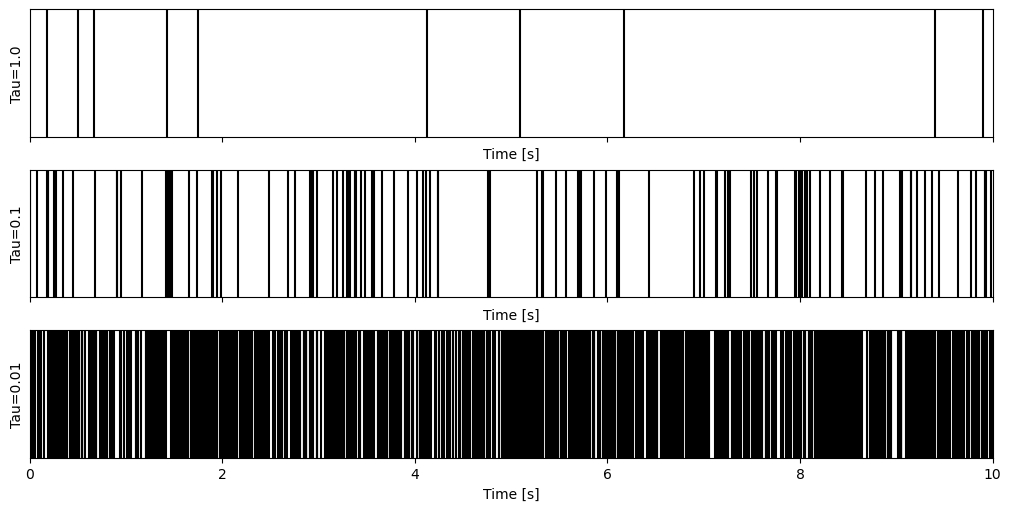

In [ ]:
length = 10
taus = [1., 0.1, 0.01]

fig, axs = plt.subplots(nrows=len(taus), figsize=(10, 5), sharex=True, constrained_layout=True)
for tau, ax in zip(taus, axs):
    spike_times = poisson_spike_train_simple(tau, 10., 1)
    raster(spike_times, ylabel=f"Tau={tau}", ax=ax)


b) Simulate 50.000 spike trains for each parameter in a) and compute the total number of spikes (i.e. the “spike count”) for each. Plot a histogram over the spike counts for each of the three conditions, as well as the mean and the variance (not standard deviation).

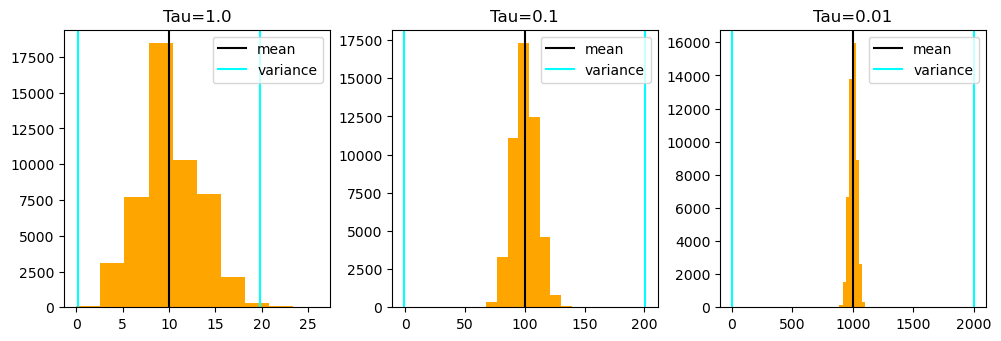

In [ ]:
# b
length = 10
taus = [1.0, 0.1, 0.01]

fig, axs = plt.subplots(
    ncols=len(taus), figsize=(9.9, 3.3), sharex=False, constrained_layout=True
)
for tau, ax in zip(taus, axs):
    spike_counts = list(map(len, poisson_spike_train_simple(tau, length, 50000)))
    ax.hist(spike_counts, color="orange")
    ax.axvline(np.mean(spike_counts), label="mean", c="black")
    ax.axvline(
        np.mean(spike_counts) - np.var(spike_counts), label="variance", color="cyan"
    )
    ax.axvline(np.mean(spike_counts) + np.var(spike_counts), color="cyan")

    ax.legend()
    ax.set_title(f"Tau={tau}")

c) Draw 10.000 samples $x_k \in \{0, 1\}$ independently from a Beronulli distribution $P (x_k ) = \lambda^{x_k} (1 − \lambda)^{1−x_k}$ with $k = 1, \ldots , 10.000$ for the following three cases: $\lambda = 0.1$, $\lambda = 0.01$, $\lambda = 0.001$. Plot the random vector $x$ as a spike train for each of the three conditions.

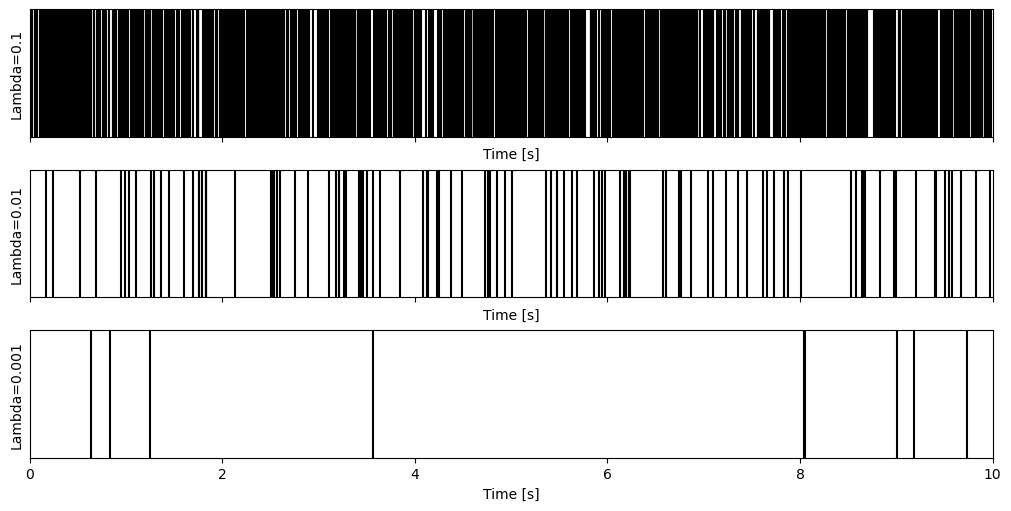

In [ ]:
def bernoulli_spike_train(p, n_samples, n_trials):
    samples = np.random.binomial(
        np.ones((n_trials, 1), dtype=int), p * np.ones((1, n_samples))
    )
    spiketrains = map(np.argwhere, samples)
    spiketimes = list(map(lambda x: x.flatten() * 10 / n_samples, spiketrains))
    return spiketimes


fig, axs = plt.subplots(
    nrows=len(taus), figsize=(10, 5), sharex=True, constrained_layout=True
)
for lmbd, ax in zip([0.1, 0.01, 0.001], axs):
    raster(bernoulli_spike_train(lmbd, 10000, 1), ylabel=f"Lambda={lmbd}", ax=ax)

d) Simulate 50.000 spike trains for each parameter in c) and compute the total number of spikes (i.e. the “spike count”) for each. Plot a histogram over the spike counts for each of the three conditions, as well as the mean and the variance.

How do the results differ from those b)?

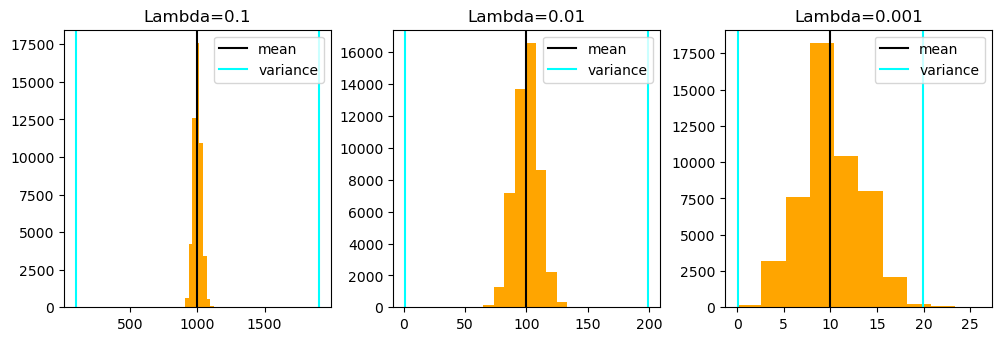

In [ ]:
# d
length = 10000
lambdas = [0.1, 0.01, 0.001]

fig, axs = plt.subplots(
    ncols=len(lambdas), figsize=(9.9, 3.3), sharex=False, constrained_layout=True
)
for lmbd, ax in zip(lambdas, axs):
    spike_counts = list(map(len, bernoulli_spike_train(lmbd, length, 50000)))
    ax.hist(spike_counts, color="orange")
    ax.axvline(np.mean(spike_counts), label="mean", c="black")
    ax.axvline(
        np.mean(spike_counts) - np.var(spike_counts), label="variance", color="cyan"
    )
    ax.axvline(np.mean(spike_counts) + np.var(spike_counts), color="cyan")

    ax.legend()
    ax.set_title(f"Lambda={lmbd}")

**Answer** I don't see any difference to the plots from b), except for different values for tau / lambda.

e) The cases in which the distributions in b) and d) match and disagree with each other is related to the limit cases discussed in the lecture. Under which circumstance do the Binomial distribution and the Poisson distribution match each other? Under these assumptions, proof, by taking the limit, that the probability functions are the same. (2 points)

*Hint: Relate $\lambda$, $p$, and $n$ to each other. Take the appropriate limit* $$\lim_{\substack{? \to\infty \\ ?\to 0}}$$
*and show that $P_{Bernoulli}(X=s)$ in the limit is the same as $P_{Poisson}(X=s)$.*

**Answer**



**Proof**



## Exercise 2
2) Compute the mean and variance of the Poisson distribution with parameter $\lambda$ (first try yourself) (3 points)

**Answer**

(see pdf)


## Exercise 3
3) Show that the sum of two independent Poisson random variables of parameters $\lambda$ and $\mu$ is again Poisson with
parameter $\lambda + \mu $. (2 points)

If $X \sim \text{Poisson}(\lambda) $ and $Y \sim \text{Poisson}(\mu)$, we have:
\begin{equation*}
\begin{split}
P(k = X + Y) & = \sum_{i=0}^{k} P(X = i, Y = k - i) \\
& = TODO
\end{split}
\end{equation*}

(see pdf)
